In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(.6**4*.4**3)*35+\
(.6**5*.4**2)*21+\
(.6**6*.4**1)*7+\
(.6**7*.4**0)*1

0.7102080000000001

In [ ]:
.05/(6*10**-7)

83333.33333333334

In [ ]:
def perceptron(x, y):
    n=np.size(y)
    w = np.array([0,0])
    b = 0
    i = 0
    converged = False
    while(converged == False):
        converged = True
        for i in range(n):
            print(y[i]*(w.dot(x[i])+b))
            if y[i]*(w.dot(x[i])+b) <= 0:
                converged = False
                w = w+y[i]*x[i]
                b = b+y[i]
    return w, b

In [ ]:
w, b = perceptron(x,y)
print(w, b)

NameError: ignored

#Projective rectangle subdivision

##Prototyping

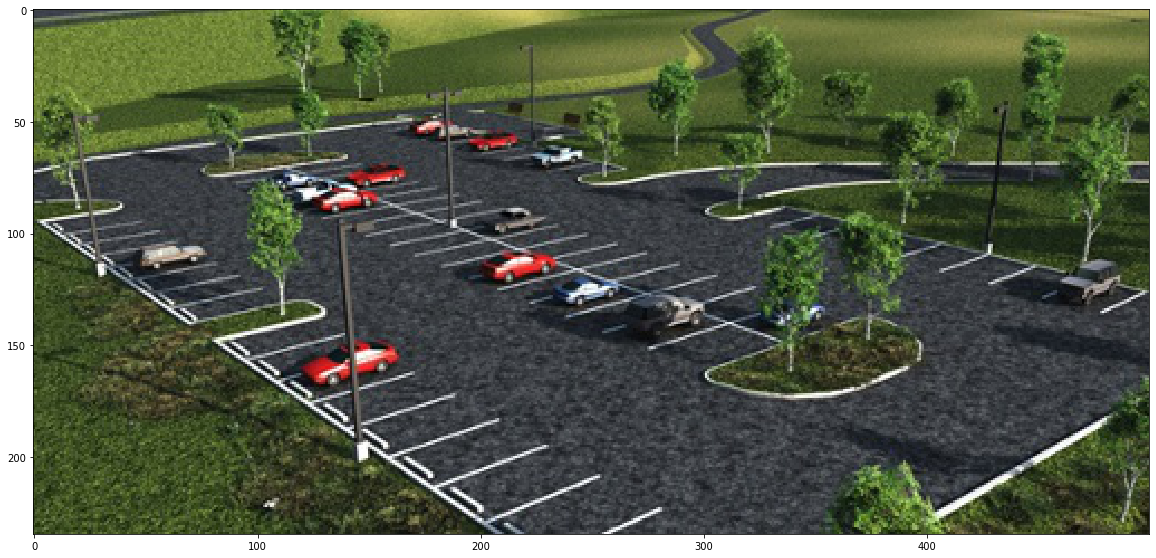

In [ ]:
img=plt.imread('paradise.jpg')
plt.figure(figsize=(20,20))
plt.imshow(img)

[64 70 70]
0.2664046875


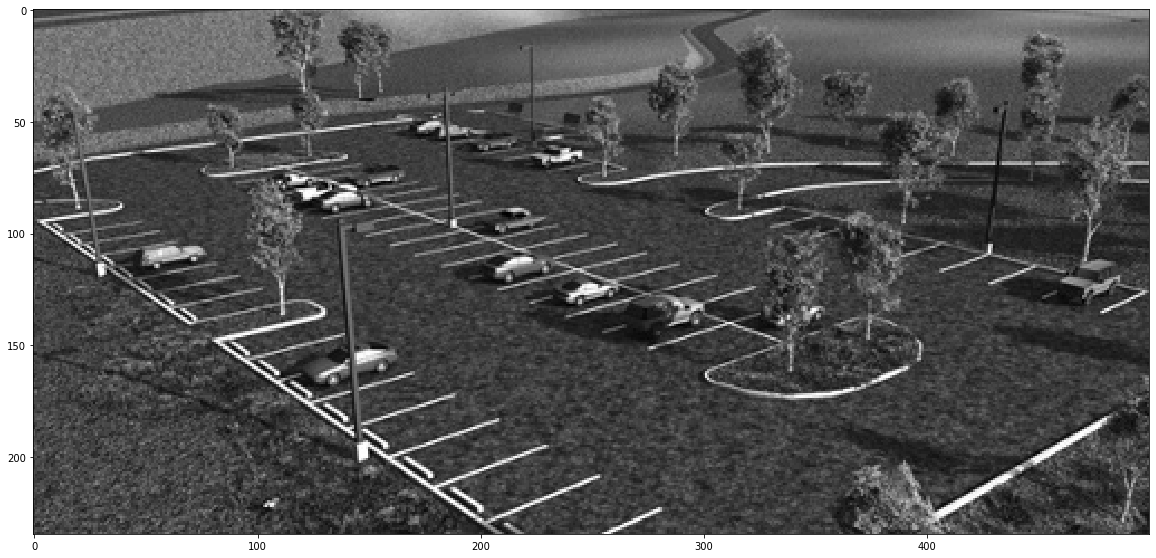

In [ ]:
img[:,:,0]
img_gs = np.dot(img[...,:3], [0.2989, 0.5870, 0.1140])/256
#img_gs=img_gs/(256*3)
print(img[0,0,:])
print(img_gs[0,0])
plt.figure(figsize=(20,20))
plt.imshow(img_gs, cmap='gray')

<Figure size 1440x1440 with 0 Axes>

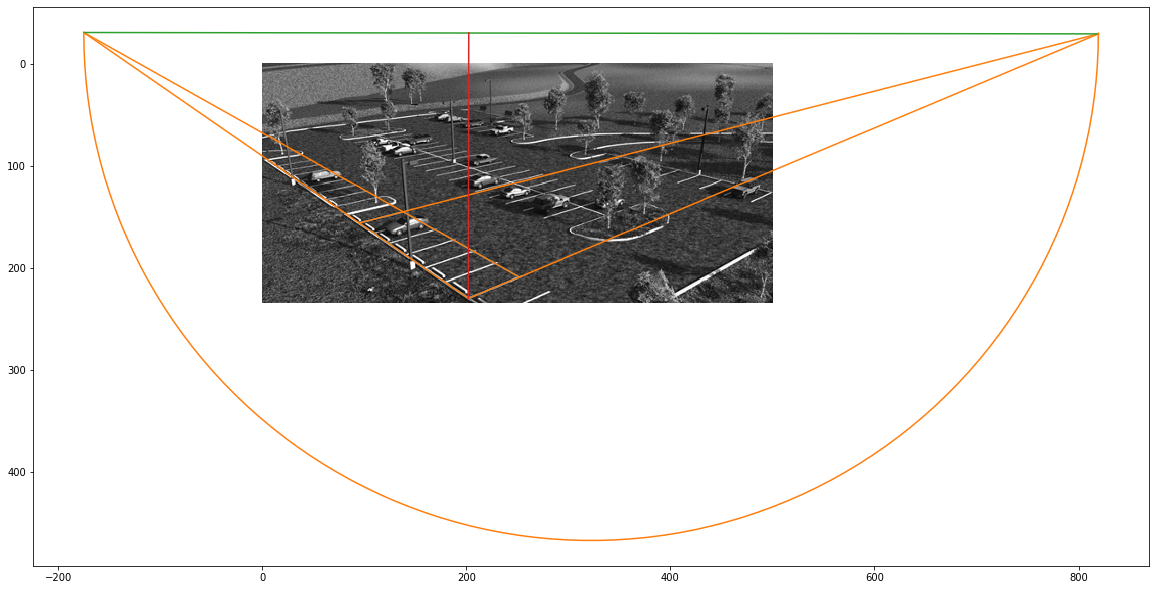

In [ ]:
# get intersection of a line passing through A1, A2 and 
# another line passing through B1, B2
def intersect(A1,A2,B1,B2):
    k_A = (A1[1]-A2[1])/(A1[0]-A2[0])
    l_A = A1[1]-k_A*A1[0]
    k_B = (B1[1]-B2[1])/(B1[0]-B2[0])
    l_B = B1[1]-k_B*B1[0]
    x=(l_B-l_A)/(k_A-k_B)
    y=k_A*x+l_A
    return x, y

A=(202,230)
B=(252,209)
C=(138,145)
D=(95,156)
n_spots = 6 #number of parking spots 

x1, y1 = intersect(A,B,C,D) # vanishing point 1

x2, y2 = intersect(A,D,B,C) # vanishing point 2

# horizon line
k_h = (y1-y2)/(x1-x2)
l_h = y2-k_h*y1

k_o = -1/k_h
l_o = A[1]-k_o*A[0]
x3 = (l_h-l_o)/(k_o-k_h)
y3 = k_h*x3+l_h

r = np.sqrt((x1-x2)**2+(y1-y2)**2)/2
x_s = (x1+x2)/2
y_s = (y1+y2)/2
r_sq = (x2-x1)**2+(y2-y1)**2

plt.figure(figsize=(20,20))
fig, ax = plt.subplots(1, figsize=(20,20))
ax.imshow(img_gs, cmap='gray')
ax.plot([A[0],B[0],C[0],D[0],A[0]],[A[1],B[1],C[1],D[1],A[1]])
#right vanishing point
ax.plot([A[0],x1],[A[1],y1], color='C1')
ax.plot([D[0],x1],[D[1],y1], color='C1')
#left vanishing point
ax.plot([A[0],x2],[A[1],y2], color='C1')
ax.plot([B[0],x2],[B[1],y2], color='C1')
#horizon line
ax.plot([x1,x2],[y1,y2], color='C2')
ax.plot([A[0], x3], [A[1], y3], color='C3')
ax.plot(x_circle, y_circle)

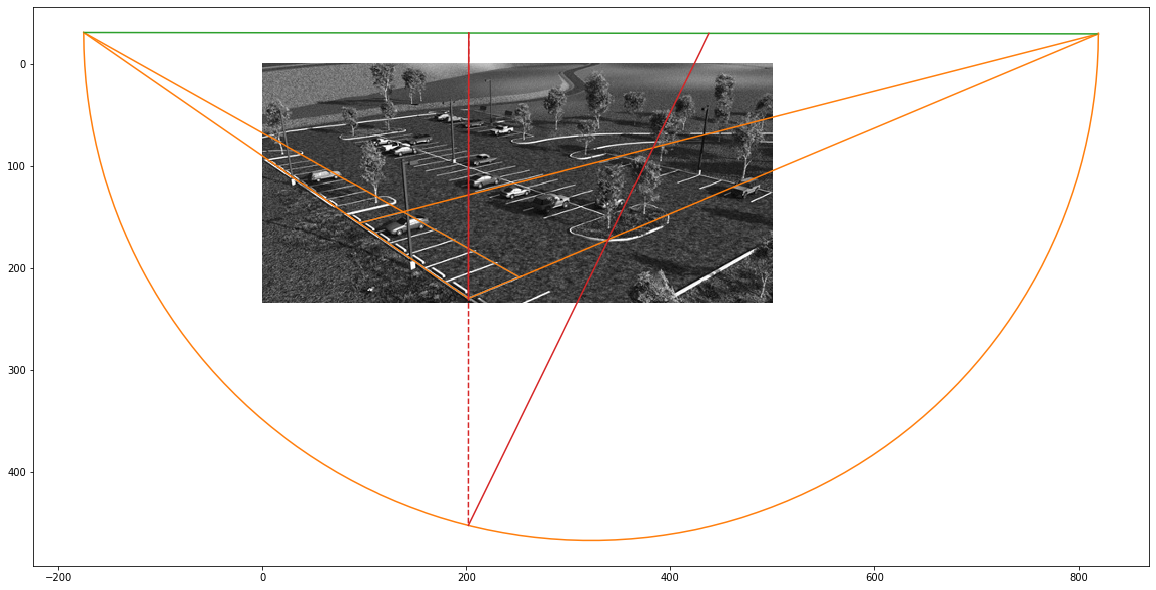

In [ ]:
x_s = (x1+x2)/2
y_s = (y1+y2)/2
r_sq = (x2-x1)**2+(y2-y1)**2

#if horizon line is mostly horizontal, assume it is exactly horizontal
if abs(k_h) < 0.01:
    x_A1 = A[0]
    y_A1 = -(-(r**2-(x_s-x_A1)**2)**.5-y_s)
else:
    a_temp = 1+k_o**2
    b_temp = 2*k_o*(l_o-y_s)-2*x_s
    c_temp = x_s**2+(y_s-l_o)**2-r_sq
    D_temp = (b_temp**2 - 4*a_temp*c_temp)**.5
    x_A1_1 = (-b_temp+D_temp)/2*a_temp
    y_A1_1 = k_o*x_A1_1 + l_o
    x_A1_2 = (-b_temp-D_temp)/2*a_temp
    y_A1_2 = k_o*x_A1_2 + l_o
    if y_A1_1 > y_A1_2:
        x_A1 = x_A1_1
        y_A1 = y_A1_1
    else:
        x_A1 = x_A1_2
        y_A1 = y_A1_2

M1_dist = ((x2-x_A1)**2+(y2-y_A1)**2)**.5
M2_dist = ((x1-x_A1)**2+(y1-y_A1)**2)**.5
horizon_vec = np.array([1,k_h])
horizon_vec = horizon_vec/np.linalg.norm(horizon_vec)
M1 = np.array([x2,y2])+horizon_vec*M1_dist
M2 = np.array([x1,y1])-horizon_vec*M2_dist


fig, ax = plt.subplots(1, figsize=(20,20))
ax.imshow(img_gs, cmap='gray')
ax.plot([A[0],B[0],C[0],D[0],A[0]],[A[1],B[1],C[1],D[1],A[1]])
#right vanishing point
ax.plot([A[0],x1],[A[1],y1], color='C1')
ax.plot([D[0],x1],[D[1],y1], color='C1')
#left vanishing point
ax.plot([A[0],x2],[A[1],y2], color='C1')
ax.plot([B[0],x2],[B[1],y2], color='C1')
#horizon line
ax.plot([x1,x2],[y1,y2], color='C2')
ax.plot([A[0], x3], [A[1], y3], color='C3')
ax.plot(x_circle, y_circle)
ax.plot([x3, x_A1], [y3, y_A1], color='C3', linestyle='--')
ax.plot([x_A1, M1[0]], [y_A1, M1[1]], color='C3')
#ax.plot([x_A1, M2[0]], [y_A1, M2[1]], color='C3')


In [ ]:
# line through M1 and A:
k_M1A = (M1[1]-A[1])/(M1[0]-A[0])
l_M1A = M1[1]-k_M1A*M1[0]

# line through M1 and D:
k_M1D = (M1[1]-D[1])/(M1[0]-D[0])
l_M1D = M1[1]-k_M1D*M1[0]

# line parallel to the horizon through A:
k_base = k_h
l_base = A[1]-k_base*A[0]

# intersection of base line and line through M1 and D:
base_points = np.zeros((n_spots+1, 2))
base_points[0] = np.array(A)

base_points[n_spots][0] = (l_M1D-l_base)/(k_base-k_M1D)
base_points[n_spots][1] = k_base*base_points[n_spots][0]+l_base
print(base_points[n_spots], k_base, l_base, k_M1D, l_M1D, D)
base_points[:,0] = np.linspace(base_points[0][0], 
                               base_points[n_spots][0], 
                               n_spots+1)
base_points[:,1] = np.linspace(base_points[0][1], 
                               base_points[n_spots][1], 
                               n_spots+1)

bottom_points = np.array([[0,0]]*(n_spots+1))
bottom_points = np.array([intersect(A, D, M1, point) for point in base_points])
top_points = np.array([[0,0]]*(n_spots+1))
top_points = np.array([intersect(B, C, np.array([x1,y1]), point) for point in bottom_points])


[-40.89388356 229.66771295] 0.0013680338265476218 229.72365716703737 -0.5420973410959229 207.49924740411268 (95, 156)


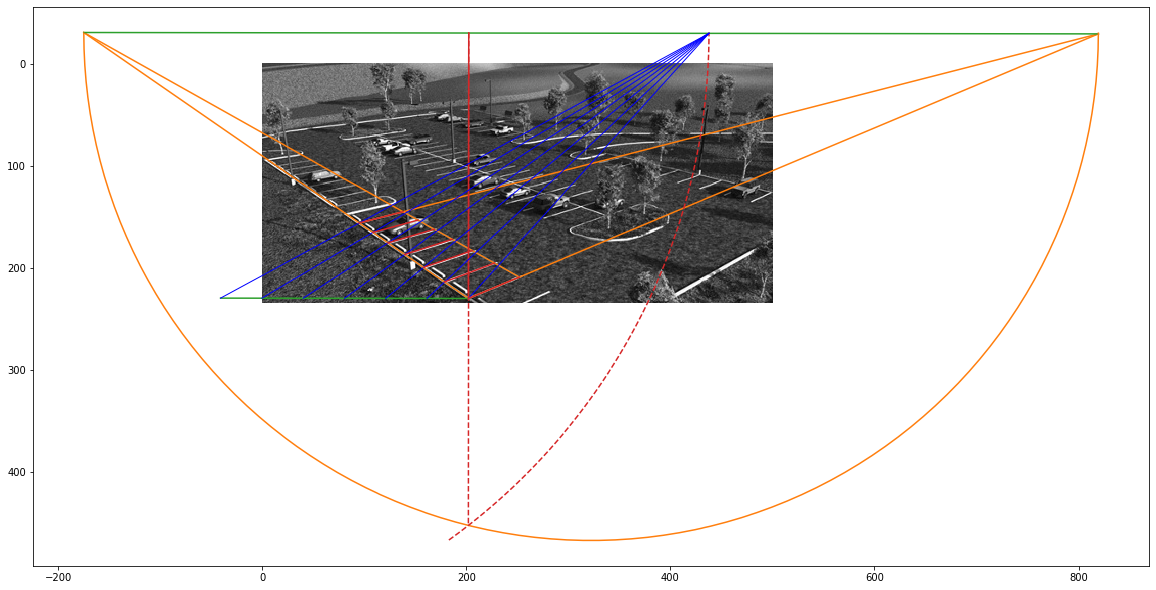

In [ ]:
fig, ax = plt.subplots(1, figsize=(20,20))
ax.imshow(img_gs, cmap='gray')
ax.plot([A[0],B[0],C[0],D[0],A[0]],[A[1],B[1],C[1],D[1],A[1]])
#right vanishing point
ax.plot([A[0],x1],[A[1],y1], color='C1')
ax.plot([D[0],x1],[D[1],y1], color='C1')
#left vanishing point
ax.plot([A[0],x2],[A[1],y2], color='C1')
ax.plot([B[0],x2],[B[1],y2], color='C1')
#horizon line
ax.plot([x1,x2],[y1,y2], color='C2')
ax.plot([A[0], x3], [A[1], y3], color='C3')

theta = np.linspace(np.pi, 2*np.pi, 100)
x_circle = r*np.cos(theta)+x_s
y_circle = -r*np.sin(theta)+y_s
ax.plot(x_circle, y_circle)
ax.plot([x3, x_A1], [y3, y_A1], color='C3', linestyle='--')
#ax.plot([  , M1[0]], [y_A1, M1[1]], color='C3')
theta2 = np.linspace(-np.pi/3+0.1, 0, 100)
x_circle2 = M1_dist*np.cos(theta2)+x2
y_circle2 = -M1_dist*np.sin(theta2)+y2
ax.plot(x_circle2, y_circle2, color='C3', linestyle='--')
ax.plot([A[0], base_points[n_spots,0]], [A[1], base_points[n_spots,1]], color='C2')
#ax.plot([x_A1, M2[0]], [y_A1, M2[1]], color='C3')
for point in base_points:
    ax.plot([point[0], M1[0]], [point[1],M1[1]], color='b', linewidth=1)
#for point in base_points:
    #ax.plot([point[0], x1], [point[1],y1], color='b', linewidth=1)
    
for pair in zip(bottom_points,top_points):
    ax.plot([pair[0][0], pair[1][0]], [pair[0][1], pair[1][1]], color='C3')


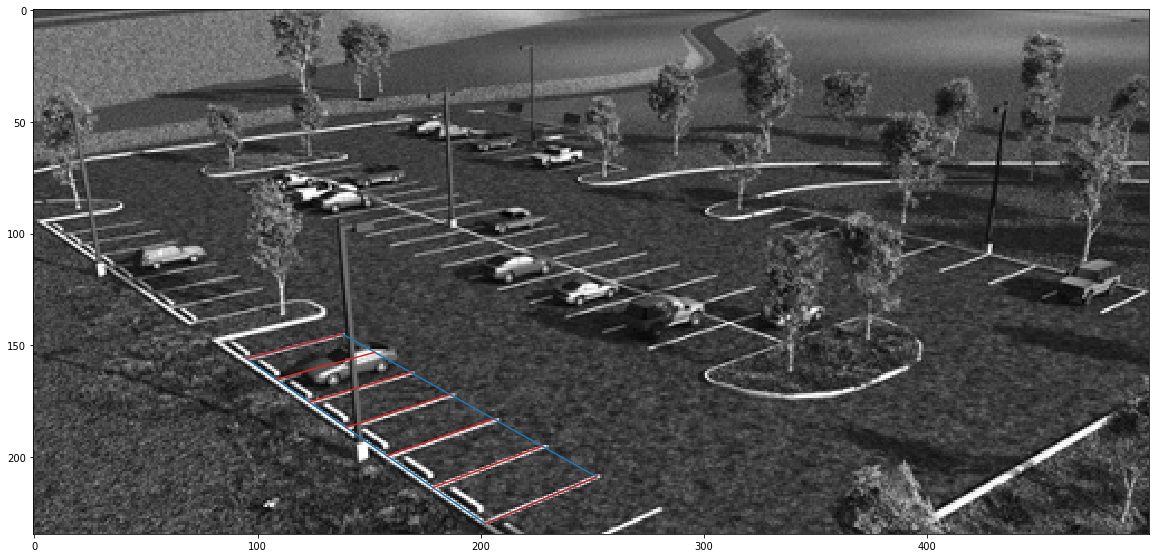

In [ ]:
fig, ax = plt.subplots(1, figsize=(20,20))
ax.imshow(img_gs, cmap='gray')
ax.plot([A[0],B[0],C[0],D[0],A[0]],[A[1],B[1],C[1],D[1],A[1]])
for pair in zip(bottom_points,top_points):
    ax.plot([pair[0][0], pair[1][0]], [pair[0][1], pair[1][1]], color='C3')


##Finished Implementation

In [ ]:
# returns parameters k and l for line passing through A and B
def get_line(A, B):
    k = (A[1]-B[1])/(A[0]-B[0])
    l = A[1]-k*A[0]
    return k, l

# get intersection of a line passing through A1, A2 and 
# another line passing through B1, B2
def intersect_point_pairs(A1,A2,B1,B2):
    k1, l1 = get_line(A1,A2)
    k2, l2 = get_line(B1,B2)
    return intersect(k1, l1, k2, l2)

# get intersection of lines (y=k1*x+l1) and (y=k2*x+l2)
def intersect(k1, l1, k2, l2):
    x = (l2-l1)/(k1-k2)
    y = k1*x+l1
    return x, y

# Divides a, angled rectangle in a set of equally spaced inner rectangles, 
# such as a number of neighboring parking spaces. 
# 
# INPUT: 
#   A, B, C and D: 2d points (numpy arrays or python lists) representing the 
#     corners of a rectangle in a picture. A should be the bottom-most point,
#     B, C and D should be arranged so that AB and CD are the long sides, 
#     for example:
#         B----+----+----C
#         |    |    |    |
#         |    |    |    |
#         A----+----+----D
#   n: number of desired inner rectangles (3 in the above example)
#
# OUTPUT:
#   two arrays P1 and P2 of 2d points and size n+1 - the first one divides AD 
#   equidistantly, the second one does the same for BC, so that P1[i]-P2[i] is 
#   the line dividing the i-th and i+1st spaces. 
#   (P1[0] = A, P1[n]=D, P2[0]=B, P2[n]=C)
def divide_rectangle(A, B, C, D, n):
    A=np.array(A)
    B=np.array(B)
    C=np.array(C)
    D=np.array(D)
    x1, y1 = intersect_point_pairs(A,B,C,D) # vanishing point 1 (V1)
    x2, y2 = intersect_point_pairs(A,D,B,C) # vanishing point 2 (V2)

    # horizon line
    k_h, l_h = get_line([x1,y1], [x2,y2])

    # nexus point
    x_n = (x1+x2)/2
    y_n = A[1]

    # line perpendicular to horizon line, passing through A:
    k_o = -1/k_h
    l_o = y_n-k_o*x_n
    
    # intersection between horizon and perpendicular line
    x3, y3 = intersect(k_h, l_h, k_o, l_o)

    # parameters for circle such that the line V1V2 is its diameter
    r = np.sqrt((x1-x2)**2+(y1-y2)**2)/2 # radius
    x_s = (x1+x2)/2
    y_s = (y1+y2)/2 # center
    r_sq = r**2 #squared radius

    # calculate the intersection P between the perpendicular line
    # and the circle
    # if horizon line is mostly horizontal, assume it is exactly horizontal
    if abs(k_h) < 0.0001:
        x_P = A[0]
        y_P = -(-(r**2-(x_s-x_P)**2)**.5-y_s)
    else: 
        a_temp = 1+k_o**2
        b_temp = 2*k_o*(l_o-y_s)-2*x_s
        c_temp = x_s**2+(y_s-l_o)**2-r**2
        D_temp = ((b_temp**2) - 4*a_temp*c_temp)**.5
        x_P_1 = (-b_temp+D_temp)/(2*a_temp)
        y_P_1 = k_o*x_P_1 + l_o
        x_P_2 = (-b_temp-D_temp)/(2*a_temp)
        y_P_2 = k_o*x_P_2 + l_o
        if y_P_1 > y_P_2:
            x_P = x_P_1
            y_P = y_P_1
        else:
            x_P = x_P_2
            y_P = y_P_2

    # this is where things get hairy
    # M1 is a point on the horizon line such that d(M1,V2) = d(P,V2)
    # M2 is a point on the horizon line such that d(M2,V1) = d(P,V1)
    M1_dist = ((x2-x_P)**2+(y2-y_P)**2)**.5
    M2_dist = ((x1-x_P)**2+(y1-y_P)**2)**.5
    horizon_vec = np.array([1,k_h]) 
    horizon_vec = horizon_vec/np.linalg.norm(horizon_vec)
    M1 = np.array([x2,y2])+horizon_vec*M1_dist
    M2 = np.array([x1,y1])-horizon_vec*M2_dist

    # line through M1 and A:
    k_M1A, l_M1A = get_line(M1, A)

    # line through M1 and D:
    k_M1D, l_M1D = get_line(M1, D)

    # line parallel to the horizon through nexus point (base line):
    k_base = k_h
    l_base = y_n-k_base*x_n

    base_points = np.zeros((n_spots+1, 2))
    # intersection of base line and line through M1 and A:
    base_points[0] = intersect(k_base, l_base, k_M1A, l_M1A)

    # intersection of base line and line through M1 and D:
    base_points[n_spots] = intersect(k_base, l_base, k_M1D, l_M1D)

    # equidistant subdivision of base line
    base_points[:,0] = np.linspace(base_points[0][0], 
                                base_points[n_spots][0], 
                                n_spots+1)
    base_points[:,1] = np.linspace(base_points[0][1], 
                                base_points[n_spots][1], 
                                n_spots+1)

    bottom_points = np.array([intersect_point_pairs(A, D, M1, point) for point in base_points])
    top_points = np.array([intersect_point_pairs(B, C, np.array([x1,y1]), point) for point in bottom_points])

    dist = np.linalg.norm(base_points[0]-base_points[1])
    for i in range(n_spots):
        print(np.linalg.norm(base_points[i+1]-base_points[i])-dist)

    # draw
    fig, ax = plt.subplots(1, figsize=(20,20))
    ax.imshow(img_gs, cmap='gray')
    ax.plot([A[0],B[0],C[0],D[0],A[0]],[A[1],B[1],C[1],D[1],A[1]])
    # right vanishing point
    ax.plot([A[0],x1],[A[1],y1], color='C1')
    ax.plot([D[0],x1],[D[1],y1], color='C1')
    # left vanishing point
    ax.plot([A[0],x2],[A[1],y2], color='C1')
    ax.plot([B[0],x2],[B[1],y2], color='C1')
    # horizon line
    ax.plot([x1,x2],[y1,y2], color='C2')

    theta = np.linspace(np.pi, 2*np.pi, 100)
    x_circle = r*np.cos(theta)+x_s
    y_circle = -r*np.sin(theta)+y_s
    ax.plot(x_circle, y_circle)
    ax.plot([x3, x_P], [y3, y_P], color='C3', linestyle='--')
    theta2 = np.linspace(-np.pi/2, 0.1, 100)
    x_circle2 = M1_dist*np.cos(theta2)+x2
    y_circle2 = -M1_dist*np.sin(theta2)+y2
    ax.plot(x_circle2, y_circle2, color='C3', linestyle='--')
    # base line
    ax.plot([x_n, base_points[n_spots,0]], [y_n, base_points[n,1]], color='C2')
    for point in base_points:
        ax.plot([point[0], M1[0]], [point[1],M1[1]], color='blue', linewidth=1)
    for pair in zip(bottom_points,top_points):
        ax.plot([pair[0][0], pair[1][0]], [pair[0][1], pair[1][1]], color='C3')
    ax.set_xlim(-img_gs.shape[1]/4,img_gs.shape[1]*5/4)
    ax.set_ylim(img_gs.shape[0]*5/4, -img_gs.shape[0]/4)

    print(img_gs.shape)
    return bottom_points, top_points

0.0
1.4210854715202004e-14
1.4210854715202004e-14
0.0
0.0
1.4210854715202004e-14
(235, 500)


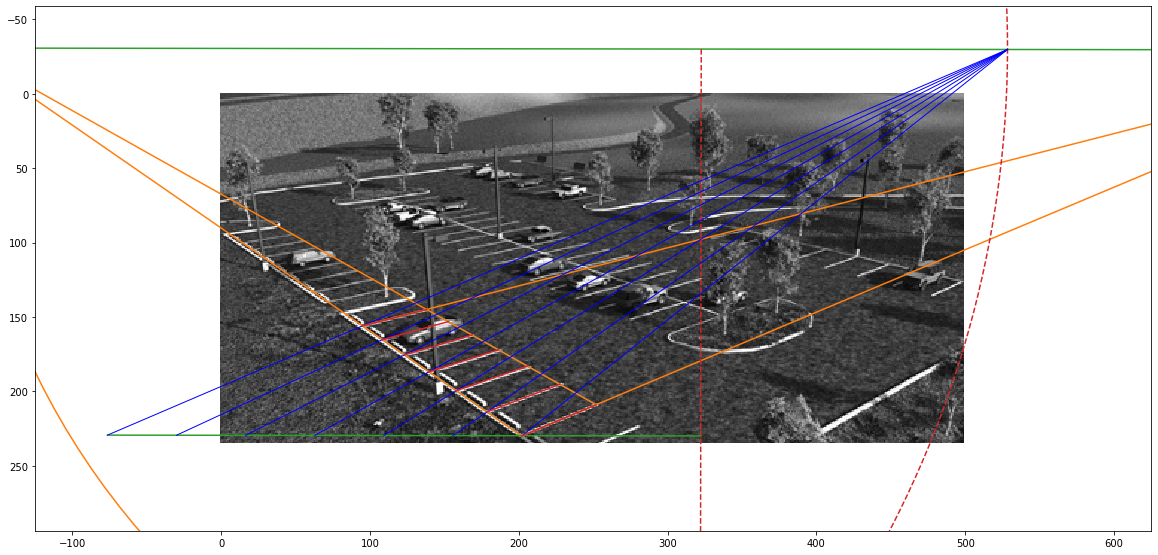

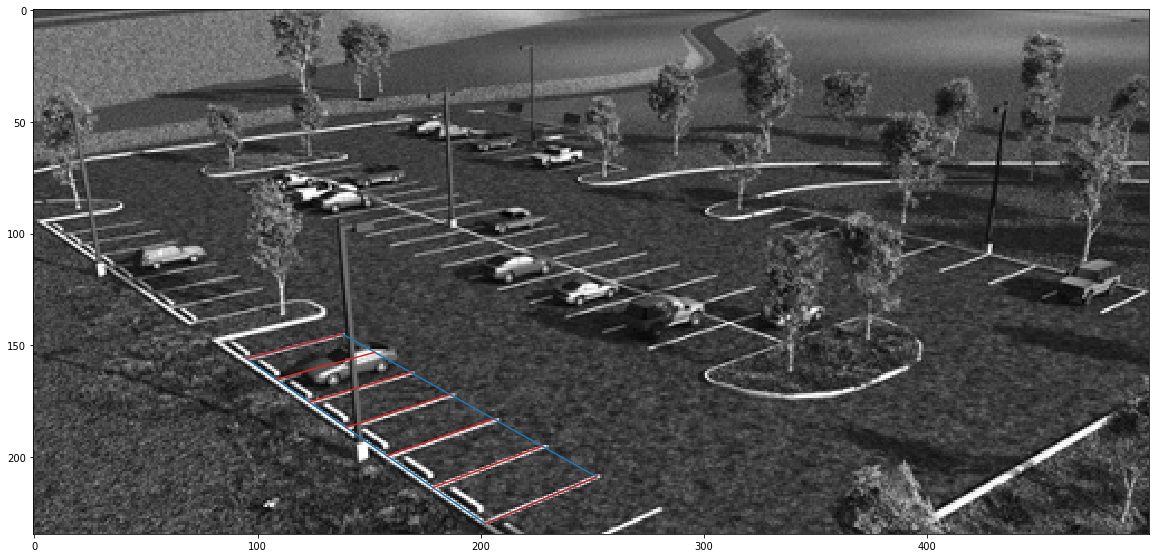

In [ ]:
img=plt.imread('parking1.jpg')
img[:,:,0]
img_gs = np.dot(img[...,:3], [0.2989, 0.5870, 0.1140])/256
A=(202,230)
B=(252,209)
C=(138,145)
D=(95,156)
n_spots = 6 #number of parking spots 

bottom_points, top_points = divide_rectangle(A,B,C,D,n_spots)

fig, ax = plt.subplots(1, figsize=(20,20))
ax.imshow(img_gs, cmap='gray')
ax.plot([A[0],B[0],C[0],D[0],A[0]],[A[1],B[1],C[1],D[1],A[1]])
for pair in zip(bottom_points,top_points):
    ax.plot([pair[0][0], pair[1][0]], [pair[0][1], pair[1][1]], color='C3')

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-1.1368683772161603e-13
8.526512829121202e-14
8.526512829121202e-14
-2.2737367544323206e-13
8.526512829121202e-14
(620, 1000)
(620, 1000, 3)


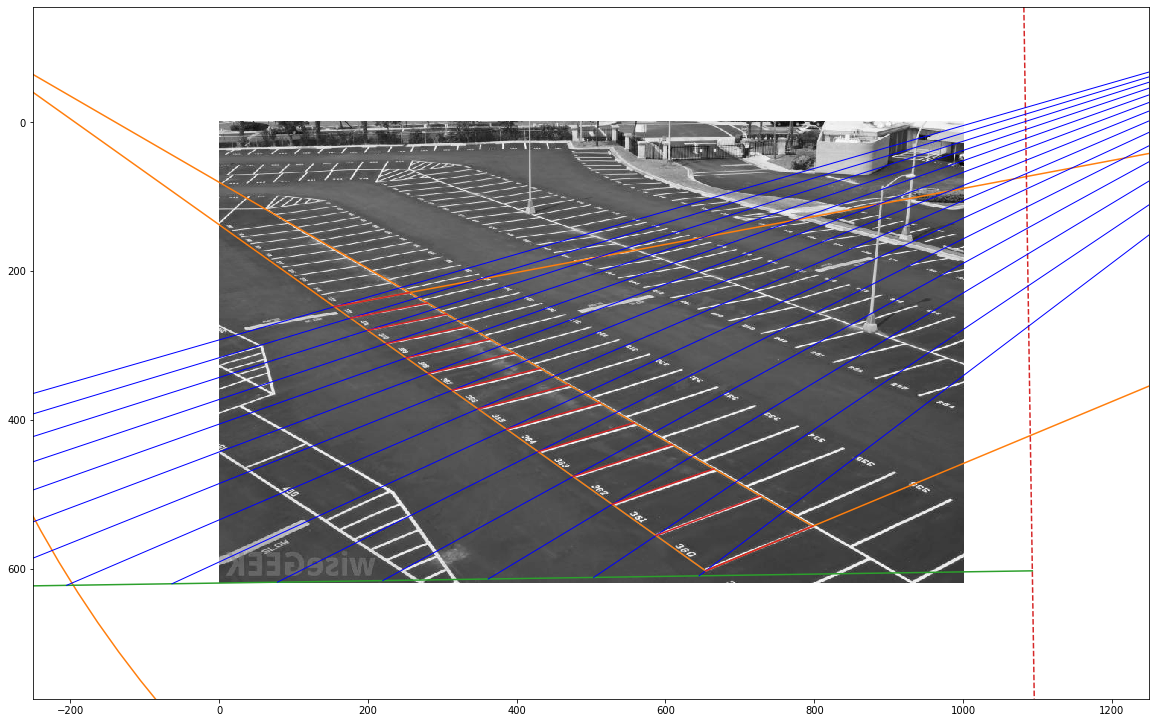

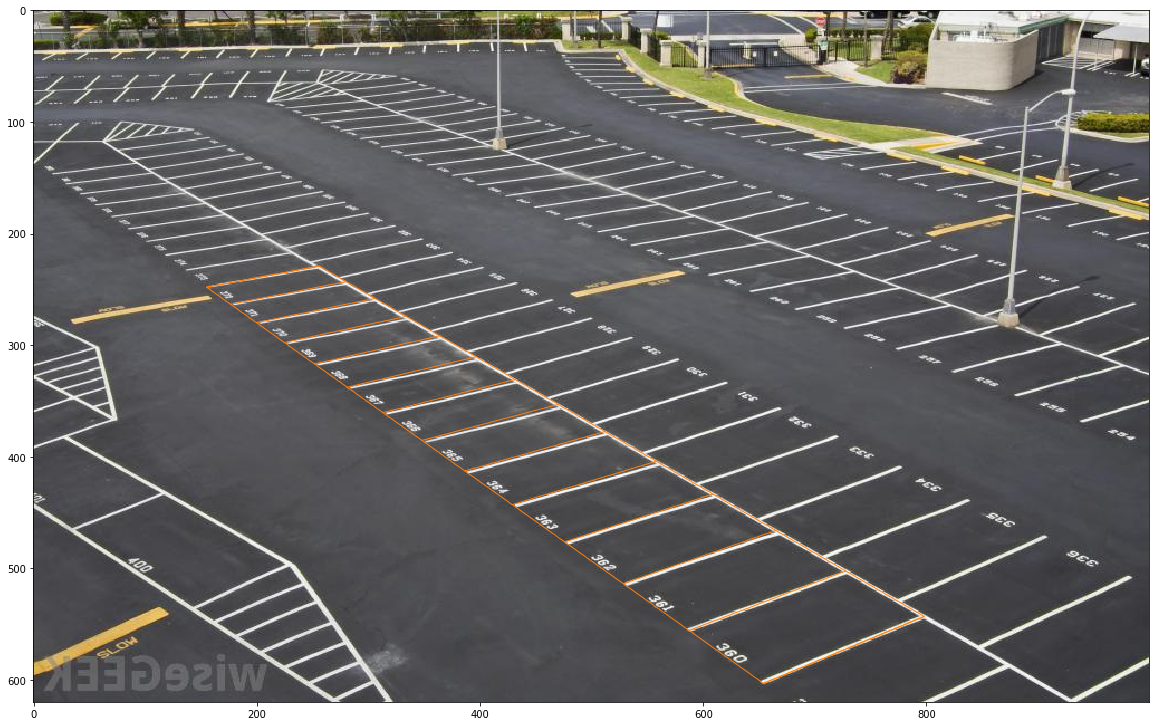

In [ ]:
img=plt.imread('parking3.jpg')
img[:,:,0]
img_gs = np.dot(img[...,:3], [0.2989, 0.5870, 0.1140])/256
n_spots = 13 #number of parking spots 

A = (654,603)
B = (798,543)
C = (256,229)
D = (155,248)

bottom_points, top_points = divide_rectangle(A,B,C,D,n_spots)
fig, ax = plt.subplots(1, figsize=(20,20))
ax.imshow(img)#, cmap='gray')
ax.plot([A[0],B[0],C[0],D[0],A[0]],[A[1],B[1],C[1],D[1],A[1]], color='C1', linewidth=1)
print(img.shape)
for pair in zip(bottom_points,top_points):
    ax.plot([pair[0][0], pair[1][0]], [pair[0][1], pair[1][1]], color='C1', linewidth=1)

(915, 1458)


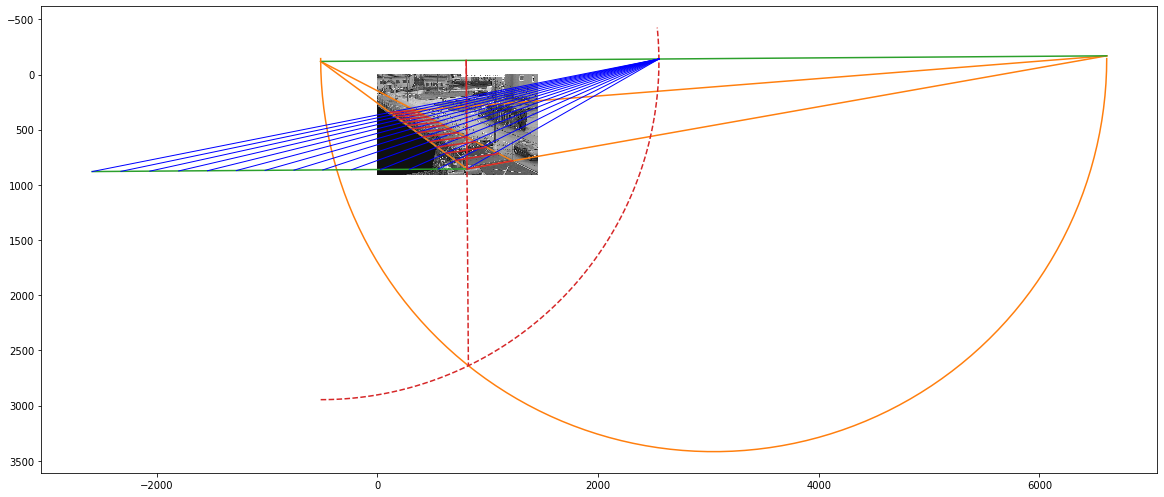

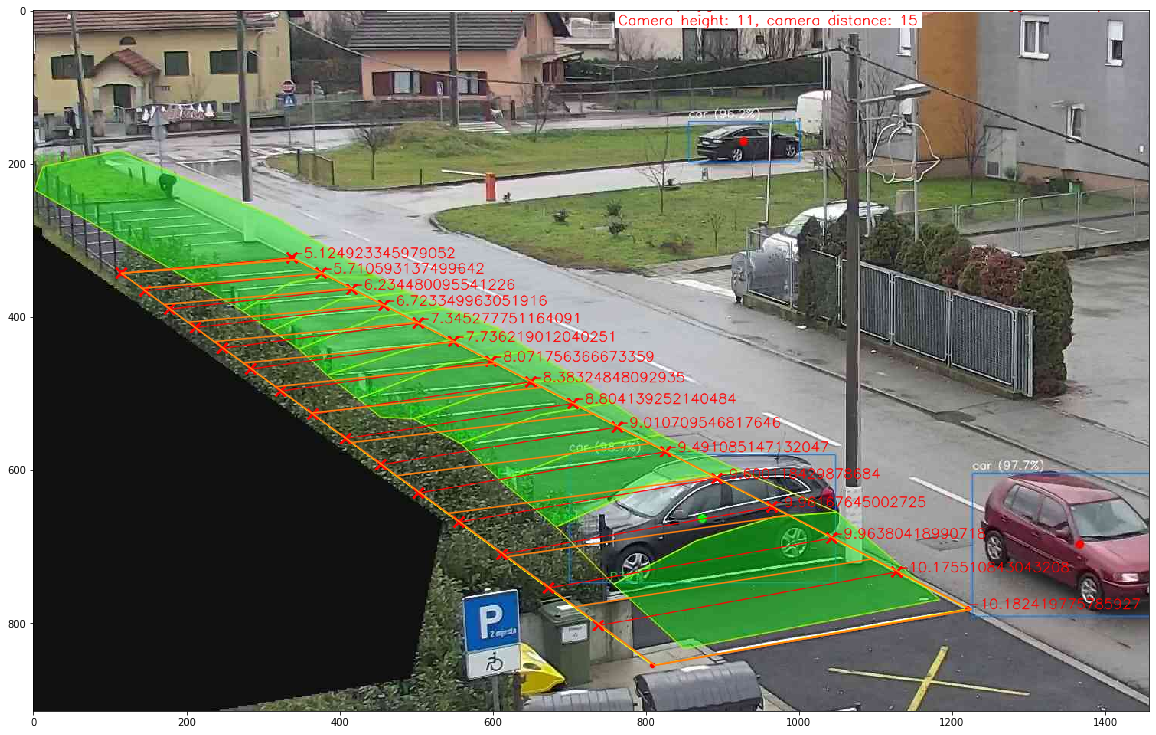

In [ ]:
img=plt.imread('parking2.png')
img[:,:,0]
img_gs = np.dot(img[...,:3], [0.2989, 0.5870, 0.1140])/256
# A1=(1180,855)
# A2=(571,525)
# B1=(1186,702)
# B2=(571,428)
# C1=(900,905)
# C2=(1150,860)
# D1=(800,755)
# D2=(1050,720)
n_spots = 13 #number of parking spots 

A = (812,855)
B = (1225,782)
C = (343,325)
D = (115,343)

bottom_points, top_points = divide_rectangle(A,B,C,D,n_spots)
fig, ax = plt.subplots(1, figsize=(20,20))
ax.imshow(img)#, cmap='gray')
ax.plot([A[0],B[0],C[0],D[0],A[0]],[A[1],B[1],C[1],D[1],A[1]], color='C1')
for pair in zip(bottom_points,top_points):
    ax.plot([pair[0][0], pair[1][0]], [pair[0][1], pair[1][1]], color='C1')
# fig, ax = plt.subplots(1, figsize=(20,20))
# ax.imshow(img_gs, cmap='gray')
# ax.plot([A[0],B[0],C[0],D[0],A[0]],[A[1],B[1],C[1],D[1],A[1]])


# plt.figure(figsize=(20,20))
# plt.plot([x1,x2],[y1,y1], color='C2')
# plt.plot([A1[0],A2[0]], [A1[1],A2[1]], color='C0')
# plt.plot([B1[0],B2[0]], [B1[1],B2[1]], color='C0')
# plt.plot([C1[0],C2[0]], [C1[1],C2[1]], color='C0')
# plt.plot([D1[0],D2[0]], [D1[1],D2[1]], color='C0')
# plt.plot([x1,x2],[y1,y1], color='C2')
# plt.imshow(img_gs, cmap='gray')

#bottom_points, top_points = divide_rectangle(A,B,C,D,n_spots)

#fig, ax = plt.subplots(1, figsize=(20,20))
#ax.imshow(img_gs, cmap='gray')
#ax.plot([A[0],B[0],C[0],D[0],A[0]],[A[1],B[1],C[1],D[1],A[1]])
#for pair in zip(bottom_points,top_points):
#    ax.plot([pair[0][0], pair[1][0]], [pair[0][1], pair[1][1]], color='C3')

In [ ]:
np.linspace(0,10,11)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [ ]:
a*a-23456542652432346354245635684567353634524*23456542652432346354245635684567353634524

0

In [ ]:
k_o = -1
l_o = -1/2
x_s = 2
y_s = -3
r=2
print("k_o: ", k_o)
a_temp = 1+k_o**2
print("k_o**2: ", k_o**2)
print("a: ", a_temp)
b_temp = 2*k_o*(l_o-y_s)-2*x_s
c_temp = (x_s**2)+(y_s-l_o)**2-(r**2)
D_temp = ((b_temp**2) - 4*a_temp*c_temp)**.5
print(k_o,l_o)
print(a_temp,b_temp,c_temp,D_temp)
print(31**.5)
print((9+31**.5)/4)
x_P_1 = (-b_temp+D_temp)/(2*a_temp)
y_P_1 = k_o*x_P_1 + l_o
x_P_2 = (-b_temp-D_temp)/(2*a_temp)
y_P_2 = k_o*x_P_2 + l_o
print(x_P_1, y_P_1)
print(x_P_2, y_P_2)

k_o:  -1
k_o**2:  1
a:  2
-1 -0.5
2 -9.0 6.25 5.5677643628300215
5.5677643628300215
3.6419410907075056
3.6419410907075056 -4.141941090707506
0.8580589092924946 -1.3580589092924946


#Intersection Over Union

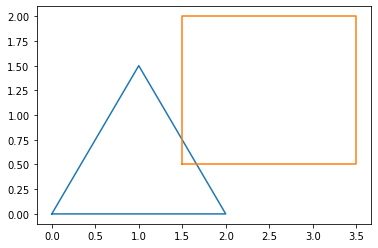

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# triangle:
A = np.array([[0,0], [2,0], [1,1.5], [0,0]])
# square
B = np.array([[1.5,0.5], [3.5,0.5], [3.5, 2], [1.5, 2], [1.5,0.5]])
plt.plot(A[:,0], A[:,1], color='C0')
plt.plot(B[:,0], B[:,1], color='C1')

##Previous polygonal logic implementation

0 :  -90.0
1 :  90.0
2 :  90.0
3 :  -90.0
4 :  90.0
5 :  149.03624346792648
6 :  -104.0362434679265
7 :  90.0
8 :  -104.03624346792647
9 :  149.0362434679265
10 :  90.0
360.00000000000006


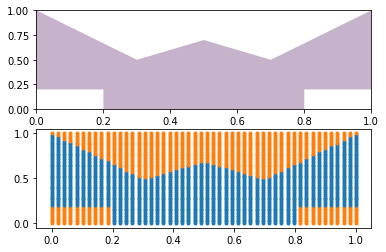

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection


def get_ext_angle(i,polygon):
    """Finds the exterior angle of point i in polygon"""
    n=len(polygon)
    if i < 0 or i >= n:
        raise RuntimeError("Error - index "+str(i)
                           +" is out of polygon bounds ("+str(n)+")")
    a=polygon[i]-polygon[i-1]
    a=a/np.linalg.norm(a);
    last = polygon[i+1] if i+1<len(polygon) else polygon[0]
    b=last-polygon[i]
    b=b/np.linalg.norm(b)
    a_perpendicular=np.array([-a[1], a[0]])
    coeff=np.sign(np.dot(a_perpendicular,b))
    return np.arccos(np.dot(a,b))*180/np.pi*coeff

def rectify_polygon(polygon):
    """Ensures vertices are saved in counter-clockwise order"""
    angle_sum=0
    for i in range(len(polygon)):
        angle_sum+=get_ext_angle(i,polygon)
    angle_sum=int(np.round(angle_sum))
    if angle_sum==-360:
        polygon=polygon[::-1]
    elif angle_sum != 360:
        raise RuntimeError("Error - exterior angles do not ",
                           "sum up to 360 degrees (total is ", angle_sum)
    return polygon

def is_convex(polygon):
    for i in range(len(polygon)):
        if get_ext_angle(i,polygon) < 0: return False
    return True

def decompose_shape(polygon):
    """Decomposes a concave polygon into the smallest possible convex shape
    and several 'negative' areas that represent the concave parts"""
    # First, rectify the polygon into a CCW order
    polygon=rectify_polygon(polygon)
        
    negative_areas=[]
    while(not is_convex(polygon)):
        # Detect concave vertices
        concave_vertices=np.zeros(len(polygon), dtype=bool)
        for i in range(len(polygon)):
            if get_ext_angle(i,polygon) < 0: concave_vertices[i]=True
        
        # Construct negative areas
        for i in range(len(concave_vertices)):
            if concave_vertices[i]:
                negative_area=[polygon[i-1]]
                while concave_vertices[i]:
                    negative_area=negative_area+[polygon[i]]
                    i = i+1 if i<len(polygon)-1 else 0
                negative_area=negative_area+[polygon[i]]
                negative_area=np.array(negative_area)
                negative_area=negative_area[::-1]
                negative_areas=negative_areas+[negative_area]
                
        # Clean up positive area
        polygon=polygon[concave_vertices==False]
    return polygon, negative_areas
                
def is_in_convex_polygon(point, polygon):
    """Given a point and a CONVEX, CCW polygon, returns True if point is
    located inside the bounds of the polygon"""
    for i in range(len(polygon)):
        side=polygon[i]-polygon[i-1]
        norm=np.array([-side[1],side[0]])
        if np.dot(point-polygon[i-1],norm) < 0: return False
    return True
    
def is_in_polygon(point, concave_polygon):
    """Returns True if the point is located within the positive area
    of the polygon, but outside any of the negative areas"""
    if not is_in_convex_polygon(point,concave_polygon[0]): return False
    for item in concave_polygon[1]:
        if is_in_convex_polygon(point,item): return False
    return True

polygon=np.array([[0.2,0.2],[0.2,0],[0.8,0], 
                  [0.8,0.2],[1,0.2],[1,1], 
                  [0.7,0.5], [0.5,0.7], [0.3,0.5],[0,1],[0,0.2]])
polygon=polygon[::-1]
polygon=rectify_polygon(polygon)
sum=0
for i in range(len(polygon)):
    angle=get_ext_angle(i,polygon)
    sum+=angle
    print(i,": ", angle)
print(sum)
shapes=[Polygon(polygon)]
polygon,neg=decompose_shape(polygon)
#for area in neg:
#    shapes.append(Polygon(area))
pc=PatchCollection(shapes,alpha=0.3)
#pc.set_array(np.append([1], np.zeros(len(neg))))
pc.set_array(np.array([1]))
fig,(ax1,ax2)=plt.subplots(2,1)
ax1.add_collection(pc)
#fig.colorbar(pc,ax=ax1)

a=np.linspace(0,1,50)
b=np.linspace(0,1,50)
#print(is_in_polygon(np.array([0.5,0.5]),[polygon,neg]))
for x in a:
    for y in b:
        hit=is_in_polygon(np.array([x,y]),[polygon,neg])
        ax2.plot([x],[y],('C0.' if hit else 'C1.'))

plt.show()


In [ ]:
# returns parameters k and l for line passing through A and B
def get_line(A, B):
    k = (A[1]-B[1])/(A[0]-B[0])
    l = A[1]-k*A[0]
    return k, l

# get intersection of a line passing through A1, A2 and 
# another line passing through B1, B2
def intersect_point_pairs(A1,A2,B1,B2):
    k1, l1 = get_line(A1,A2)
    k2, l2 = get_line(B1,B2)
    return intersect(k1, l1, k2, l2)

# get intersection of lines (y=k1*x+l1) and (y=k2*x+l2)
def intersect(k1, l1, k2, l2):
    x = (l2-l1)/(k1-k2)
    y = k1*x+l1
    return x, y

def polygon_intersection_list(P1, P2):
    """returns a list of points where the edges of polygons P1 and P2 intersect"""
    P1=np.array(P1)
    P2=np.array(P2)
    n1 = P1.shape[0]
    n2 = P2.shape[0]
    P1 = np.concatenate((P1,np.array([P1[0]])), axis=0)
    P2 = np.concatenate((P2,np.array([P2[0]])), axis=0)
    print(P1,P2)
    results = []
    for i in range(n1):
        for j in range(n2):
            p11=P1[i]
            p12=P1[i+1]
            p21=P2[i]
            p22=P2[i+1]
            k1,l1 = get_line(p11,p12)
            k2,l2 = get_line(p21,p22)
            if(k1 != k2):
                x, y = intersect_point_pairs(p11,p12,p21,p22)
                if (min(p11[0],p12[0]) < x < max(p11[0],p12[0]) and 
                    min(p21[0],p22[0]) < x < max(p21[0],p22[0]) and
                    min(p11[1],p12[1]) < y < max(p11[1],p12[1]) and
                    min(p21[1],p22[1]) < y < max(p21[1],p22[1])):
                    results = results+[x, y, i, j]
    return results

##New, class-based polygonal logic

In [ ]:
class ParkingSpot:
    def __init__(points):
        self.polygon = ConcavePolygon(points)
        # blabla
    def smoothing():
        # blabla

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class ConcavePolygon():
    def __init__(self, vertices):
        self.vertices = np.array(vertices)
        self.rectify()
        self.edges = [Segment(self.vertices[i], self.vertices[i+1]) 
                        for i in range(len(self.vertices)-1)]
        self.edges = self.edges+[Segment(vertices[-1], vertices[0])]
        self.convex, self.negative = self.decompose_shape()

    def get_ext_angle(self,i,polygon):
        """Finds the exterior angle of point i in polygon"""
        n=len(self.vertices)
        if i < 0 or i >= n:
            raise ValueError("Error - index "+str(i)
                            +" is out of polygon bounds ("+str(n)+")")
        a=polygon[i]-polygon[i-1]
        a=a/np.linalg.norm(a);
        last = polygon[i+1] if i+1<len(polygon) else polygon[0]
        b=last-polygon[i]
        # print('Relevant vertices: ', polygon[i-1], polygon[i], last)
        b=b/np.linalg.norm(b)
        a_perpendicular=np.array([-a[1], a[0]])
        coeff=np.sign(np.dot(a_perpendicular,b))
        # print(a, b, a_perpendicular, coeff, np.arccos(np.dot(a,b))*180/np.pi*coeff)
        return np.arccos(np.dot(a,b))*180/np.pi*coeff

    def get_ext_angle_self(self,i):
        """Finds the exterior angle of point i in polygon"""
        return self.get_ext_angle(i, self.vertices)

    def get_edge(self,i):
        return Segment(self.vertices[i],
                       self.vertices[i+1] if i+1 < len(self.vertices) \
                                            else self.vertices[0])

    def rectify(self):
        """Ensures vertices are saved in counter-clockwise order"""
        angle_sum=0
        for i in range(len(self.vertices)):
            angle_sum+=self.get_ext_angle_self(i)
        angle_sum=int(np.round(angle_sum))
        if angle_sum==-360:
            self.vertices=self.vertices[::-1]
        elif angle_sum != 360:
            raise RuntimeError("Error - exterior angles do not ",
                            "sum up to 360 degrees (total is ", angle_sum, ")")
        
    def is_convex(self,polygon):
        for i in range(len(polygon)):
            # print(i, self.get_ext_angle(i, polygon))
            if self.get_ext_angle(i, polygon) < 0: return False
        return True

    def decompose_shape(self):
        """Decomposes a concave polygon into the smallest possible convex shape
        and several 'negative' areas that represent the concave parts"""
        # First, rectify the polygon into a CCW order
        polygon=self.vertices
            
        negative_areas=[]
        while(not self.is_convex(polygon)):
            # print(polygon)
            # Detect concave vertices 
            concave_vertices=np.zeros(len(polygon), dtype=bool)
            for i in range(len(polygon)):
                if self.get_ext_angle(i,polygon) < 0: concave_vertices[i]=True
            
            # Construct negative areas
            for i in range(len(concave_vertices)):
                if concave_vertices[i]:
                    negative_area=[polygon[i-1]]
                    while concave_vertices[i]:
                        negative_area=negative_area+[polygon[i]]
                        i = i+1 if i<len(polygon)-1 else 0
                    negative_area=negative_area+[polygon[i]]
                    negative_area=np.array(negative_area)
                    negative_area=negative_area[::-1]
                    negative_areas=negative_areas+[negative_area]
                    
            # Clean up positive area
            polygon=polygon[concave_vertices==False]
        return polygon, negative_areas

    def is_in_convex_polygon(self, point, polygon):
        """Given a point and a CONVEX, CCW polygon, returns True if point is
        located inside the bounds of the polygon"""
        for i in range(len(polygon)):
            side=polygon[i]-polygon[i-1]
            norm=np.array([-side[1],side[0]])
            if np.dot(point-polygon[i-1],norm) < 0: return False
        return True
        
    def contains(self, point):
        """Returns True if the point is located within the positive area
        of the polygon, but outside any of the negative areas"""
        if not self.is_in_convex_polygon(point, self.convex): return False
        for item in self.negative:
            if self.is_in_convex_polygon(point,item): return False
        return True

    def get_intersections(self, polygon):
        """Returns a list of intersections between the edges of this 
        and another polygon"""
        intersections = []
        indices = []
        for i,edge1 in enumerate(self.edges):
            for j,edge2 in enumerate(polygon.edges):
                try:
                    p, point = edge1.intersect(edge2)
                    if p: 
                        intersections.append(point)
                        indices.append([i,j,0])
                except ValueError:
                    continue
        return intersections #, indices

    def get_area_convex(self, polygon):
        """Returns the area of a convex polygon"""
        ref_point = polygon[0]
        distances_inner = [np.linalg.norm(point-ref_point) for point in polygon[1:]]
        distances_outer = [np.linalg.norm(polygon[i]-polygon[i-1]) for i in range(len(polygon))]
        area=0
        for i in range(len(polygon)-2):
            side_a = distances_inner[i]
            side_b = distances_inner[i+1]
            side_c = distances_outer[i+2]
            s = (side_a+side_b+side_c)/2
            area = area + np.sqrt(s*(s-side_a)*(s-side_b)*(s-side_c)) # Heron's formula
        return area

    def get_area(self):
        """Returns total area of the polygon"""
        convex_area = self.get_area_convex(self.convex)
        negative = np.array([self.get_area_convex(negative_area) for negative_area in self.negative])
        return convex_area - np.sum(negative)

    def get_intersection_area(self, B):
        """Analytically returns the area of the intersection between this and
        another polygon, using a sweep-line approach"""
        
        # list of intersections between the edges of the two polygons
        intersections = self.get_intersections(B)

        # unique, sorted x-values of every point of interest in the composition
        # (vertices for both polygons, and any intersections between their
        # edges)
        print(np.array(intersections).shape)
        if intersections:
            sweep_line = np.unique(np.sort(np.concatenate((np.array(intersections),
                                                       self.vertices, 
                                                       B.vertices),
                                                      axis=0)[:,0]))
        else:
            sweep_line = np.unique(np.sort(np.concatenate((self.vertices, B.vertices),
                                                                        axis=0)[:,0]))

        # midpoints for each two neighboring points of interest
        # the sweep line will stop at each of these points 
        # and be evaluated
        midpoints = (sweep_line[:-1]+sweep_line[1:])/2

        # the range between each two points of interests
        h = sweep_line[1:]-sweep_line[:-1]

        # for each midpoint, determine a cross-section by selecting
        # all edges that cross the sweep line at that point
        #
        # note that because the sweep line is vertical, none of these
        # edges will be vertical
        intersection_area=0
        for i,midpoint in enumerate(midpoints):
            edge_list=[]    # edges above this specific mid-point
            indices=[]      # a lexicon to memorize which edge belongs to which 
                            # polygon
            for edge in self.edges:
                if edge.start[0] < midpoint < edge.end[0] or\
                    edge.end[0] < midpoint < edge.start[0]:
                    edge_list.append(edge)
            indices=np.zeros((len(edge_list),1))
            for edge in B.edges:
                if edge.start[0] < midpoint < edge.end[0] or\
                    edge.end[0] < midpoint < edge.start[0]:
                    edge_list.append(edge)
            indices=np.concatenate((indices, 
                                    np.ones((len(edge_list)-len(indices),1))),
                                   axis=0)

            # list of tuples [k,l] such that the respective edge 
            # lies on the line k*x+l
            lines = np.array([edge.get_line() for edge in edge_list])

            # the y-values (heights) at which the edges intersect the sweep line 
            # at current position
            heights = np.reshape(lines[:,0]*midpoint+lines[:,1],(-1,1))

            # generate an array where we will store the y-value of 
            # the intersections between the sweep-line and the edges
            # together with the information about which edge belongs to which 
            # polygon
            index = np.concatenate((indices, heights),axis=1)

            # sort by height (descending):
            index = np.flip(index[index[:,1].argsort()], axis=0)

            # here is the hard part
            # we must determine which parts of the cross-section
            # belong to the intersection
            segments = np.zeros((index.shape[0]-1, 1), dtype=int)
            if index[0,0] == 0:
                is_in_A = True
                is_in_B = False
            else:
                is_in_A = False
                is_in_B = True
            # determine which parts of cross-section belong to the intersection
            for j in range(len(segments)):
                if is_in_A and is_in_B: intersection_area += (index[j,1]-index[j+1,1])*h[i]
                if index[j+1,0] == 0: is_in_A = not is_in_A
                else: is_in_B = not is_in_B
        return intersection_area

    def get_IoU(self, B):
        """Returns the ratio of the intersection and union between
        this and another polygon"""
        intersection_area = self.get_intersection_area(B)
        union_area = self.get_area() + B.get_area() - intersection_area
        return intersection_area/union_area


class Segment():
    def __init__(self, start, end):
        start = np.array(start)
        end = np.array(end)
        if np.linalg.norm(start-end) == 0.0: # comparing floats is bad
            raise ValueError('Start of segment cannot be the same as end of segment')
        self.start = start
        self.end = end
        self.vec = end-start

    def intersect(self, segment2):
        P1 = self.start
        V1 = self.vec
        P2 = segment2.start
        V2 = segment2.vec
        if V2[0]*V1[1] - V2[1]*V1[0] == 0:
            raise ValueError('Segments are parallel - cannot determine unique intersection')
        t1 = (P2[1]*V2[0] + V2[1]*P1[0] -
              V2[1]*P2[0] - P1[1]*V2[0])\
              /(V2[0]*V1[1] - V2[1]*V1[0])
        t2 = (P1[1]*V1[0] + V1[1]*P2[0] -
              V1[1]*P1[0] - P2[1]*V1[0])\
              /(V1[0]*V2[1] - V1[1]*V2[0])
        return [(0<=t1<=1 and 0<=t2<=1),self.start+self.vec*t1]

    def get_line(self):
        if self.vec[0]==0:
            raise RuntimeError('Vertical segment cannot be expressed with y=k*x+l')
        k = self.vec[1]/self.vec[0]
        l = self.start[1]-k*self.start[0]
        return np.array([k, l])

    def norm(self):
        return np.linalg.norm(self.vec)

In [ ]:
a = np.array([])
b = np.array([2,2,2,3])
np.concatenate((a,b), axis=0)

array([2., 2., 2., 3.])

##IoU Prorotype

In [ ]:
B = ConcavePolygon(np.array([[3,0], [5,8], [4,8], [2,4], [1,8], [0,8]]))

[0.         1.         1.66666667 2.         3.5       ]
0.33333333333333337
0.33333333333333337
0.33333333333333337
1.5000000000000004 3.75
IoU (analytic):  0.06779661016949153


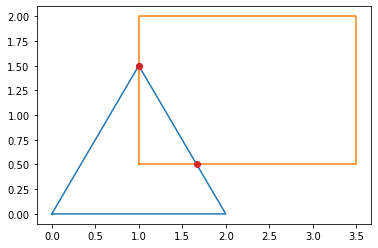

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# triangle:
A = ConcavePolygon(np.array([[0,0], [2,0], [1,1.5]]))
# square
B = ConcavePolygon(np.array([[1,0.5], [3.5,0.5], [3.5, 2], [1, 2]]))
intersections = A.get_intersections(B)
#for i,item in enumerate(intersections): intersections2[i]=item
sweep_line = np.unique(np.sort(np.concatenate((np.array(intersections), A.vertices, B.vertices), axis=0)[:,0]))
# print(sweep_line)

midpoints = (sweep_line[:-1]+sweep_line[1:])/2
h = sweep_line[1:]-sweep_line[:-1]
# find edges ad each midpoint:
big_edge_list=[]
intersection_area=0
for i,midpoint in enumerate(midpoints):
    # midpoint = midpoints[3]
    edge_list=[]
    indices=[]
    for edge in A.edges:
        if edge.start[0] < midpoint < edge.end[0] or\
            edge.end[0] < midpoint < edge.start[0]:
            edge_list.append(edge)
    indices=np.zeros((len(edge_list),1))
    for edge in B.edges:
        if edge.start[0] < midpoint < edge.end[0] or\
            edge.end[0] < midpoint < edge.start[0]:
            edge_list.append(edge)
    indices=np.concatenate((indices, np.ones((len(edge_list)-len(indices),1))),axis=0)
    lines = np.array([edge.get_line() for edge in edge_list])
    heights = np.reshape(lines[:,0]*midpoint+lines[:,1],(-1,1))
    index = np.concatenate((indices, heights, lines),axis=1)
    # sort by height:
    index = np.flip(index[index[:,1].argsort()], axis=0)

    # here is the hard part
    segments = np.zeros((index.shape[0]-1, 1), dtype=int)
    if index[0,0] == 0:
        is_in_A = True
        is_in_B = False
    else:
        is_in_A = False
        is_in_B = True
    # determine which parts of cross-section belong to the intersection
    for j in range(len(segments)):
        if is_in_A and is_in_B: intersection_area += (index[j,1]-index[j+1,1])*h[i]
        if index[j+1,0] == 0: is_in_A = not is_in_A
        else: is_in_B = not is_in_B   

print(sweep_line)
print(intersection_area)
print(A.get_intersection_area(B))
print((1*(5/3-1)/2))
print(A.get_area(), B.get_area())
union_area = A.get_area() + B.get_area() - intersection_area
print('IoU (analytic): ', intersection_area/union_area)

# all_points = np.concatenate((A.vertices, B.vertices), axis=0)
# min_x = min(all_points[:,0])
# max_x = max(all_points[:,0])
# min_y = min(all_points[:,1])
# max_y = max(all_points[:,1])
# x_spread = np.linspace(min_x,max_x,200)
# y_spread = np.linspace(min_y,max_y,200)
# i_count, u_count = 0,0
# for x in x_spread:
#     for y in y_spread:
#         hit_A = A.contains([x,y])
#         hit_B = B.contains([x,y])
#         if hit_A and hit_B:
#             i_count = i_count+1
#             u_count = u_count+1
#             plt.plot([x],[y],'o',color='C4')
#         elif hit_A or hit_B:
#             u_count = u_count+1
#             plt.plot([x],[y],'o',color='C2')
# print('IoU (numeric): ', i_count/u_count)
plt.plot(np.concatenate((A.vertices[:,0],[A.vertices[0,0]]),axis=0), 
         np.concatenate((A.vertices[:,1],[A.vertices[0,1]]),axis=0), 
         color='C0')
plt.plot(np.concatenate((B.vertices[:,0],[B.vertices[0,0]]),axis=0), 
         np.concatenate((B.vertices[:,1],[B.vertices[0,1]]),axis=0), 
         color='C1')

intersections = A.get_intersections(B)
plt.plot([point[0] for point in intersections],
         [point[1] for point in intersections],
         'o', color='C3')
plt.show()

##Some testing

In [ ]:
import time

Triangle and rectangle:
IoU (numeric):  0.06884264538198404 ; elapsed:  489.86492013931274 ms
IoU (analytic):  0.06779661016949153 ; elapsed:  0.0007407665252685547 ms

X shape: 
IoU (numeric):  0.052294303797468356 ; elapsed:  93.90505456924438 ms
IoU (analytic):  0.052631578947368404 ; elapsed:  0.0012166500091552734 ms

Rectangle and V shape:
IoU (numeric):  0.2626586281040516 ; elapsed:  331.2051725387573 ms
IoU (analytic):  0.2631578947368419 ; elapsed:  0.0017802715301513672 ms

CPU times: user 15min 11s, sys: 3.2 s, total: 15min 14s
Wall time: 15min 15s


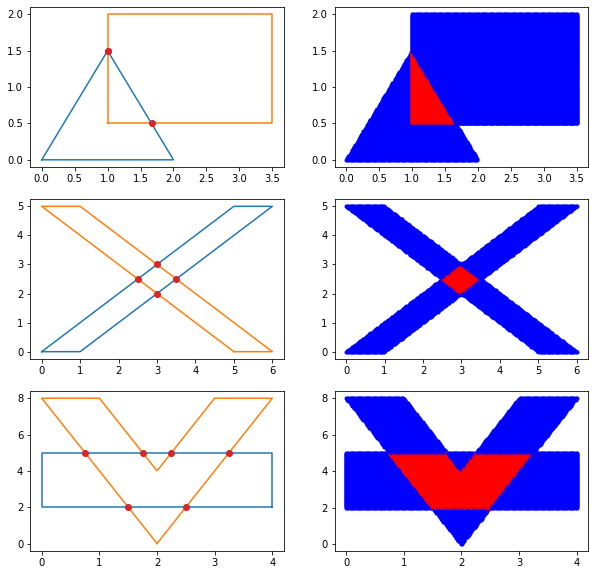

In [ ]:
%%time

def test_IoU(A, B, axis1, axis2, point_count):
    start = time.time()
    all_points = np.concatenate((A.vertices, B.vertices), axis=0)
    min_x = min(all_points[:,0])
    max_x = max(all_points[:,0])
    min_y = min(all_points[:,1])
    max_y = max(all_points[:,1])
    x_spread = np.linspace(min_x,max_x,point_count)
    y_spread = np.linspace(min_y,max_y,point_count)
    i_count, u_count = 0,0
    for x in x_spread:
        for y in y_spread:
            hit_A = A.contains([x,y])
            hit_B = B.contains([x,y])
            if hit_A and hit_B:
                i_count = i_count+1
                u_count = u_count+1
                axis2.plot([x],[y],'.',color='red')
            elif hit_A or hit_B:
                u_count = u_count+1
                axis2.plot([x],[y],'.',color='blue')
    IoU_num = i_count/u_count
    end = time.time()
    time_num = end-start
    start = time.time()
    IoU_ana = A.get_IoU(B)
    end = time.time()
    time_ana = end-start

    axis1.plot(np.concatenate((A.vertices[:,0],[A.vertices[0,0]]),axis=0), 
            np.concatenate((A.vertices[:,1],[A.vertices[0,1]]),axis=0), 
            color='C0')
    axis1.plot(np.concatenate((B.vertices[:,0],[B.vertices[0,0]]),axis=0), 
            np.concatenate((B.vertices[:,1],[B.vertices[0,1]]),axis=0), 
            color='C1')

    intersections = A.get_intersections(B)
    axis1.plot([point[0] for point in intersections],
            [point[1] for point in intersections],
            'o', color='C3')
    return IoU_num, time_num, IoU_ana, time_ana

point_count = 200 # subdivision count for numerical solution

fig, ((ax11, ax12), (ax21, ax22), (ax31, ax32)) = plt.subplots(3, 2, figsize=(10,10))

# triangle and rectangle:
A = ConcavePolygon(np.array([[0,0], [2,0], [1,1.5]]))
B = ConcavePolygon(np.array([[1,0.5], [3.5,0.5], [3.5, 2], [1, 2]]))
IoU_num, time_num, IoU_ana, time_ana = test_IoU(A, B, ax11, ax12, point_count)
print('Triangle and rectangle:')
print('IoU (numeric): ', IoU_num, '; elapsed: ', time_num, 'ms')
print('IoU (analytic): ', IoU_ana, '; elapsed: ', time_ana, 'ms')
print('')

# X shape:
A = ConcavePolygon(np.array([[0,0], [1,0], [6,5], [5,5]]))
B = ConcavePolygon(np.array([[0,5], [1,5], [6,0], [5,0]]))
IoU_num, time_num, IoU_ana, time_ana = test_IoU(A, B, ax21, ax22, point_count)
print('X shape: ')
print('IoU (numeric): ', IoU_num, '; elapsed: ', time_num, 'ms')
print('IoU (analytic): ', IoU_ana, '; elapsed: ', time_ana, 'ms')
print('')

# rectangle and V shape:
A = ConcavePolygon(np.array([[0,2], [0,5], [4,5], [4,2]]))
B = ConcavePolygon(np.array([[2,0], [4,8], [3,8], [2,4], [1,8], [0,8]]))
IoU_num, time_num, IoU_ana, time_ana = test_IoU(A, B, ax31, ax32, point_count)
print('Rectangle and V shape:')
print('IoU (numeric): ', IoU_num, '; elapsed: ', time_num, 'ms')
print('IoU (analytic): ', IoU_ana, '; elapsed: ', time_ana, 'ms')
print('')

fig.show()


(0,)
0.004705882352941209


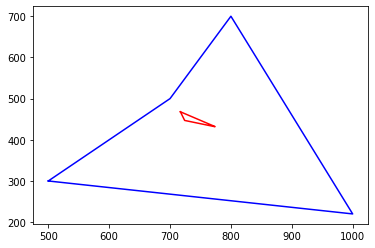

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

A = ConcavePolygon([[717, 468], [724, 447], [773, 432], [774, 432]])
B = ConcavePolygon([[500, 300], [1000, 220], [800, 700], [700, 500]])

plt.plot([717, 724, 773, 774, 717], [468, 447, 432, 432, 468], 'r')
plt.plot([500, 1000, 800, 700, 500], [300, 220, 700, 500, 300], 'b')

print(A.get_IoU(B))

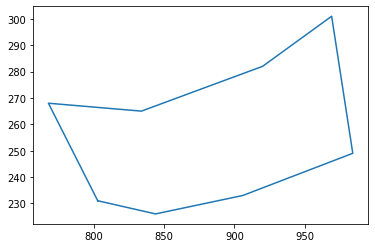

In [ ]:
plt.plot([803, 844, 906, 984, 969, 920, 834, 768, 803], [231, 226, 233, 249, 301, 282, 265, 268, 231])

In [ ]:
A = ConcavePolygon([[803, 231], [844, 226], [906, 233], [984, 249], [969, 301], [920, 282], [834, 265], [768, 268]])

print(A.vertices)

[[803 231]
 [844 226]
 [906 233]
 [984 249]
 [969 301]
 [920 282]
 [834 265]
 [768 268]]


In [ ]:
A = np.array([1,5,3,8,7,9,2])
B = A.argsort()
print(A, B, A[B], A[B[-1]])

[1 5 3 8 7 9 2] [0 6 2 1 4 3 5] [1 2 3 5 7 8 9] 9


In [ ]:
a = [i \
     for i in range(10)]
a

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]